In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [2]:
df = yf.download('BTC-USD', start='2017-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [3]:
df = df['Open'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1671, 1)


array([[ 963.65802002],
       [ 998.61700439],
       [1021.59997559],
       [1044.40002441],
       [1156.72998047]])

In [4]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1336, 1)
(385, 1)


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.01007881],
       [0.01194821],
       [0.01317721],
       [0.01439642],
       [0.02040317]])

In [6]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.45465511],
       [0.4527056 ],
       [0.45463871],
       [0.45257985],
       [0.45275067]])

In [7]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [8]:
x_train, y_train = create_dataset(dataset_train)
#x_train[:1]

In [9]:
x_test, y_test = create_dataset(dataset_test)
#x_test[:1]

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 21s 28ms/step - loss: 0.0337
Epoch 2/50
41/41 [==============================] - 1s 25ms/step - loss: 0.0064
Epoch 3/50
41/41 [==============================] - 1s 24ms/step - loss: 0.0048
Epoch 4/50
41/41 [==============================] - 1s 28ms/step - loss: 0.0038
Epoch 5/50
41/41 [==============================] - 1s 25ms/step - loss: 0.0031
Epoch 6/50
41/41 [==============================] - 1s 29ms/step - loss: 0.0029
Epoch 7/50
41/41 [==============================] - 1s 28ms/step - loss: 0.0028
Epoch 8/50
41/41 [==============================] - 1s 30ms/step - loss: 0.0027
Epoch 9/50
41/41 [==============================] - 1s 33ms/step - loss: 0.0023
Epoch 10/50
41/41 [==============================] - 1s 32ms/step - loss: 0.0023
Epoch 11/50
41/41 [==============================] - 1s 30ms/step - loss: 0.0021
Epoch 12/50
41/41 [==============================] - 1s 26ms/step - loss: 0.0022
Epoch 13/50
41/41 [=================

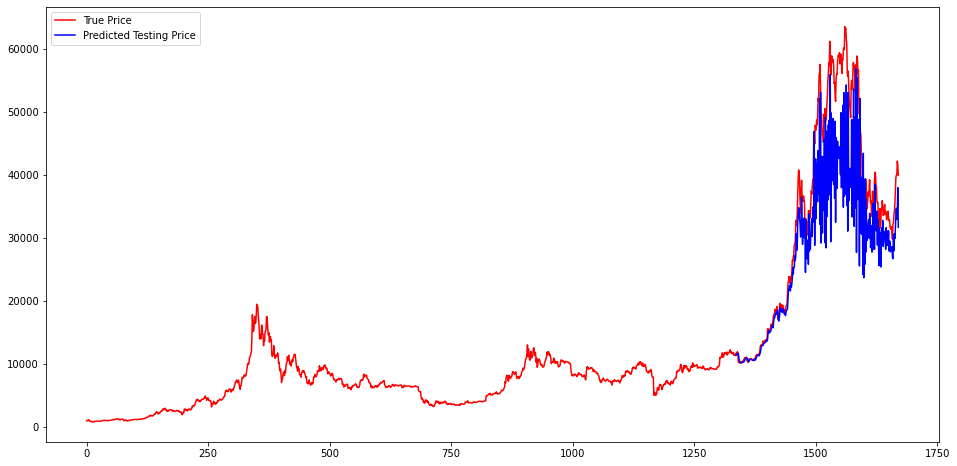

In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

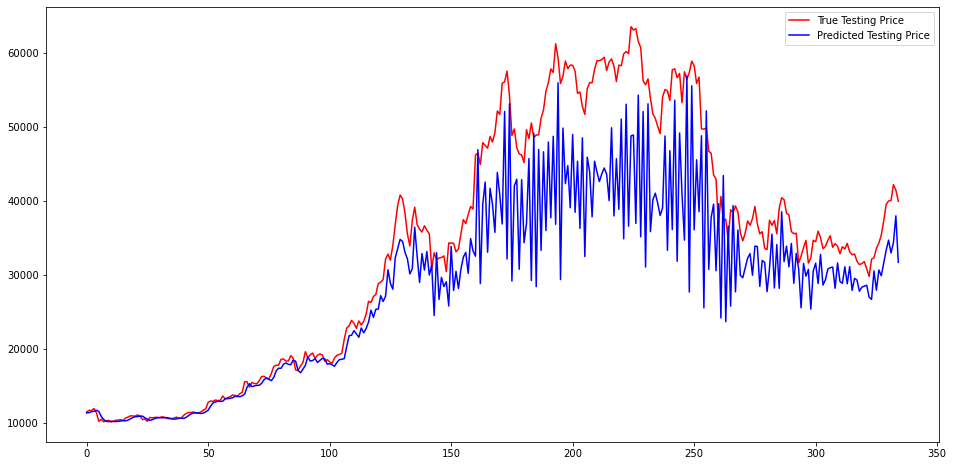

In [15]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()